# Titanic: Machine Learning from Disaster  
**1. 문제정의**  
**2. 데이터 불러오기 및 탐색**  
**3. 시각화 및 탐색**  
**4. 전처리**  
**5. 모델 구현**

# 1. 문제정의  

**생존여부(Survived) 예측**  

---
**변수(feature) 설명**  

- 	PassengerId : 승객 번호  
-	Survived : 생존여부(1 : 생존, 0 : 사망)  
-	Pclass : 승선권 클래스(1 : 1st, 2 : 2nd , 3 : 3rd)  
-	Name : 승객 이름  
-	Sex : 승객 성별  
-	Age : 승객 나이  
-	SibSp : 동반한 형제자매, 배우자 수  
-	Patch : 동반한 부모, 자식 수  
-	Ticket : 티켓의 고유 넘버  
-	Fare 티켓의 요금  
-	Cabin : 객실 번호  
-	Embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)  

# 2. 데이터 불러오기 및 탐색

In [101]:
import numpy as np 
import pandas as pd

**2-1. PassengerId를 index 열로 지정하여 titanic 데이터셋을 불러오기**

In [102]:
train = pd.read_csv('./train.csv', index_col = 'PassengerId')
test = pd.read_csv('./test.csv', index_col = 'PassengerId')
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**2-2.	Train 데이터셋의 열에 대한 요약 통계 및 결측치 확인**

In [103]:
train.describe(include = "all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Jonsson, Mr. Carl",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [104]:
print(pd.isnull(train).sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [105]:
print(pd.isnull(test).sum())

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


**2-3.	데이터셋의 feature별 유일한 값 개수 세기**

In [106]:
train.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

**2-4.	Suvived feature의 얼마나 많은 사람들이 생존하고 사망했는지 piechart 및 barplot 그리기**

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

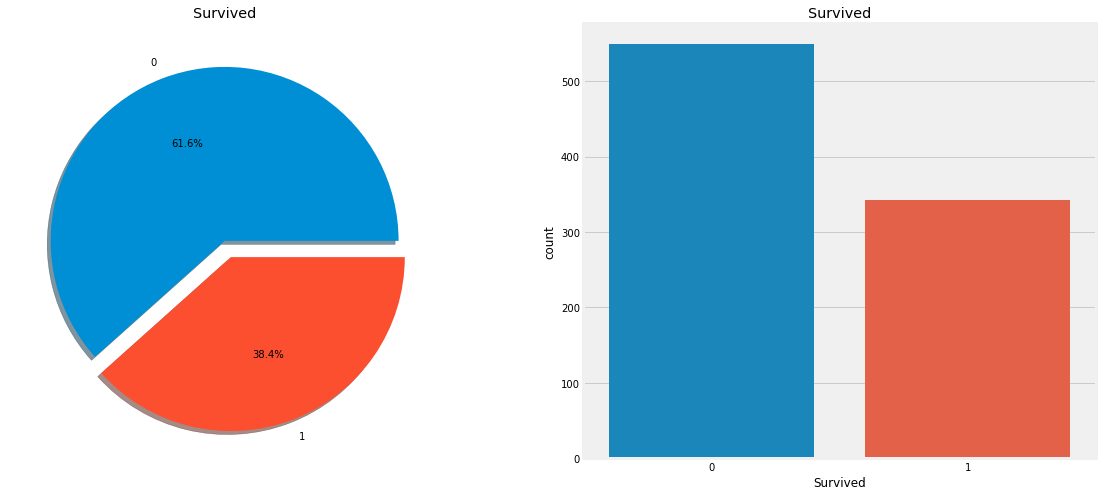

In [108]:
f,ax=plt.subplots(1, 2,figsize=(18,8))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

**2-5.	성별(Sex)별 생존 및 사망(Survived)자 수 세기**

In [109]:
train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

# 3. 시각화 및 탐색

**3-1.	Sex, Survived 피처를 사용하여 성별별 생존과 사망 빈도수 그래프 그리기**

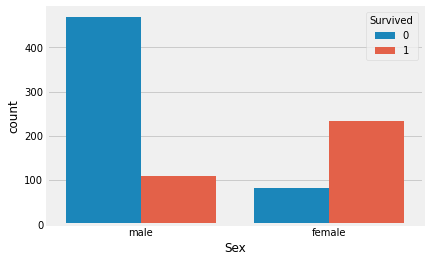

In [110]:
sns.countplot('Sex',hue='Survived',data=train)
plt.show()

**3-2.	Pclass, Survived의 교차테이블 작성**

In [111]:
pd.crosstab(train.Pclass,train.Survived,margins=True).style.background_gradient(cmap='PuBu')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


**3-3.	x축을 Pclass로, y축을 Suvived로 하여 성별(Sex)별 catplot 그려보기**

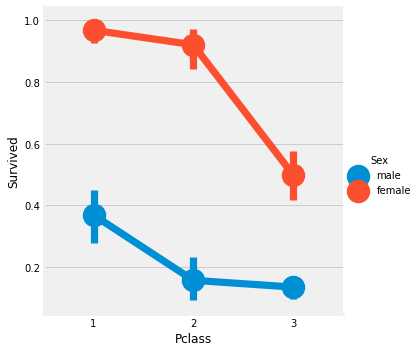

In [112]:
sns.factorplot('Pclass','Survived',hue='Sex',data=train)
plt.show()

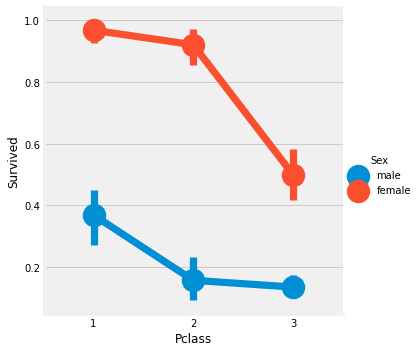

In [113]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=train, kind='point')
plt.show()

**3-4.	x축을 Pclass로, y축을 Age로 하여 boxplot 그려보기**

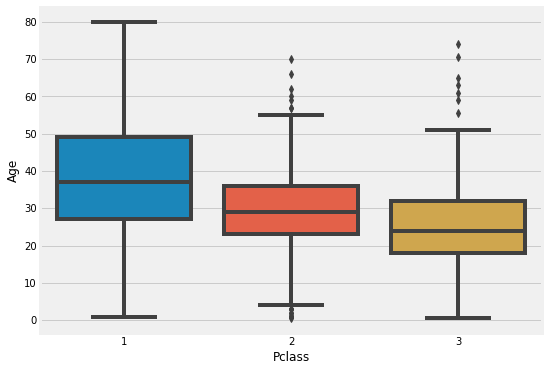

In [114]:
plt.figure(figsize = (8,6))
sns.boxplot(x='Pclass', y="Age", data=train)

**3-5.	'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'의 barplot 시각화**

In [115]:
col_names = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
import math

def plotFrequency(col_names):
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()

    for ax, col_names in zip(axes, col_names):
        if col_names == 'Survived':
            total = float(len(train[col_names]))
        sns.countplot(train[col_names], palette='plasma', ax=ax)

        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2.,
                    height + 10,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha="center")

        plt.ylabel('Count', fontsize=15, weight='bold')

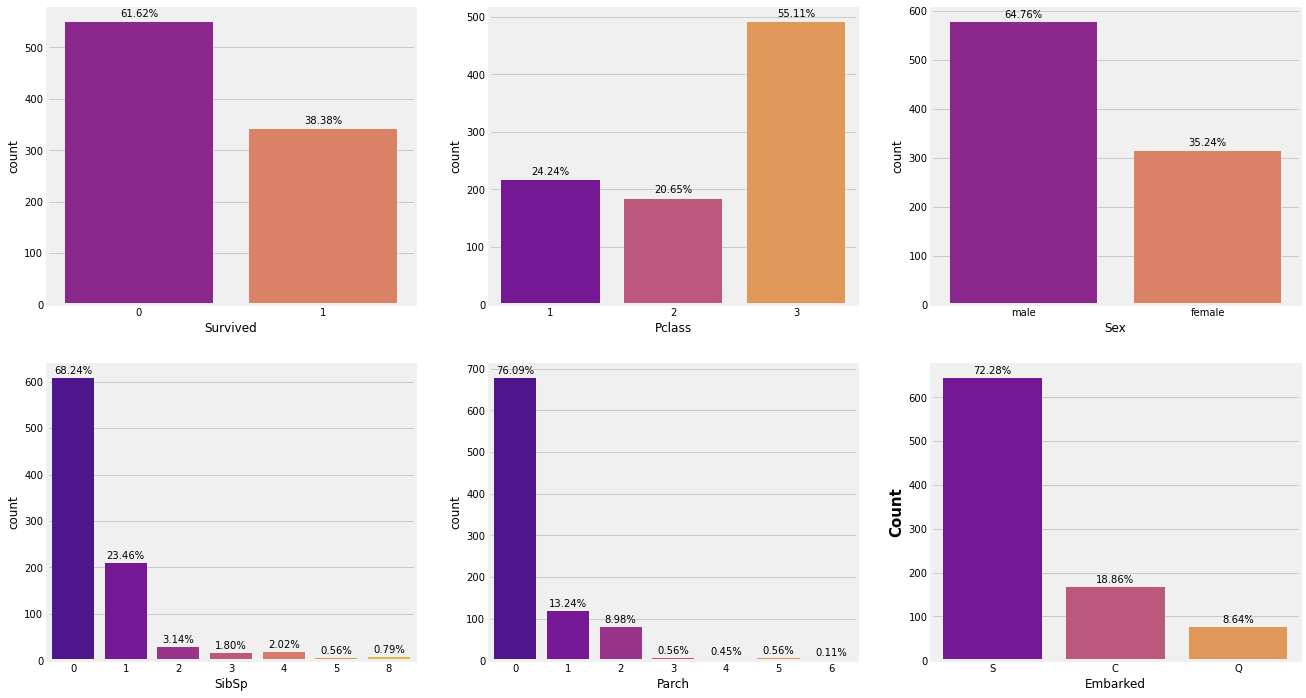

In [116]:
plotFrequency(col_names)

**3-6.	x축을 Cabin, y축을 Survived로 하고, 결측치는 제외하며, Cabin을 알파벳 순서로 barplot 그리기**

In [117]:
train['Cabin'] = train['Cabin'].dropna().apply(lambda x: x[0])
train['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

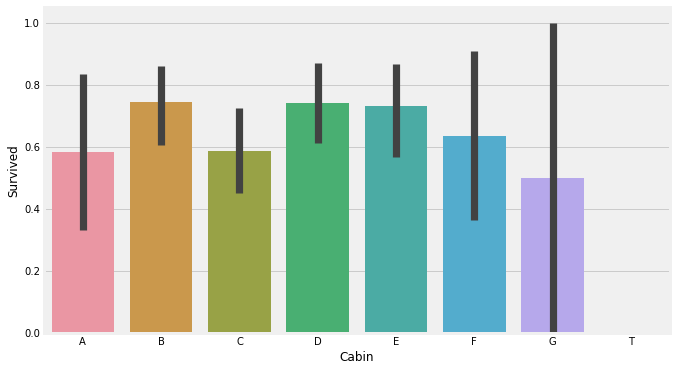

In [118]:
plt.figure(figsize=(10,6))
sns.barplot(x ='Cabin', y= 'Survived', data=train.dropna(), order='A B C D E F G T'.split(' '))

# 4. 전처리

**4-1.	AgeGroup 변수 추가**
-	결측값 = Unknown
-	0초과 5이하 = baby
-	5초과 12이하 = Child
-	12초과 18이하 = Teenager
-	18초과 24이하 = Studunt
-	24초과 35이하 = Young Adult
-	35초과 60이하 = Adult
-	60초과 = Senior

In [119]:
train["Age"] = train["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
train['AgeGroup'].head()

PassengerId
1        Student
2          Adult
3    Young Adult
4    Young Adult
5    Young Adult
Name: AgeGroup, dtype: category
Categories (8, object): [Unknown < Baby < Child < Teenager < Student < Young Adult < Adult < Senior]

In [120]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Adult
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Young Adult
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult


In [121]:
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)
test['AgeGroup'].head()

PassengerId
892    Young Adult
893          Adult
894         Senior
895    Young Adult
896        Student
Name: AgeGroup, dtype: category
Categories (8, object): [Unknown < Baby < Child < Teenager < Student < Young Adult < Adult < Senior]

In [122]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Young Adult
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Adult
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Senior
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Young Adult
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Student


**4-2.	Cabin, Ticket, Age 피처 삭제**

In [123]:
train = train.drop(['Ticket','Cabin','Age'], axis = 1)

In [124]:
test = test.drop(['Ticket','Cabin','Age'], axis = 1)

**4-3.	Embarked의 결측치를 “S”로 대체**

In [125]:
train = train.fillna({"Embarked": "S"})

In [126]:
test = test.fillna({"Embarked": "S"})

**4-4.	Name의 앞의 성만(eg. Miss, Mr, etc.) 가져오고**  

---
'Don':0, 'Rev':0, 'Capt':0, 'Jonkheer':0, 'Mr':1, 'Dr':2, 'Major':3, 'Col':3, 'Master':4, 'Miss':5, 'Mrs':6, 'Mme':7,'Ms':7,'Lady':7, 'Sir':7, 'Mlle':7, 'the Countess':7  

---
**값으로 대체**

In [127]:
train['Name'] = train['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
titles = train['Name'].unique()
titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [128]:
title_replace = {'Don':0,'Dona':0,'Rev':0,'Capt':0,'Jonkheer':0,'Mr':1,'Dr':2,'Major':3,'Col':3,'Master':4,'Miss':5,
                 'Mrs':6,'Mme':7,'Ms':7,'Lady':7,'Sir':7,'Mlle':7,'the Countess':7,"Countess": 7,}
train['Name'] = train['Name'].apply(lambda x: title_replace.get(x))

In [129]:
test['Name'] = test['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
titless = test['Name'].unique()
titless

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [130]:
title_replace = {'Don':0,'Dona':0,'Rev':0,'Capt':0,'Jonkheer':0,'Mr':1,'Dr':2,'Major':3,'Col':3,'Master':4,'Miss':5,
                 'Mrs':6,'Mme':7,'Ms':7,'Lady':7,'Sir':7,'Mlle':7,'the Countess':7,"Countess": 7}
test['Name'] = test['Name'].apply(lambda x: title_replaces.get(x))

In [131]:
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,AgeGroup
PassengerId,,,,,,,,,
1,0,3,1,male,1,0,7.2500,S,Student
2,1,1,6,female,1,0,71.2833,C,Adult
3,1,3,5,female,0,0,7.9250,S,Young Adult
4,1,1,6,female,1,0,53.1000,S,Young Adult
5,0,3,1,male,0,0,8.0500,S,Young Adult


In [144]:
test = test.fillna({'Name':0})

**4-5.**  
- Age : 'Unknown':0 ,'Baby':1 ,'Child':2, 'Teenager':3, 'Student':4, 'Young Adult':5, 'Adult':6, 'Senior':7
- Sex : "male": 0, "female": 1
- Embarked : "S": 1, "C": 2, "Q": 3  
**로 변환**

In [146]:
age_mapping = {'Unknown':0,'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

In [147]:
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

In [148]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

**4-6.	(Fare<= 30) = 0, (30<Fare<=80) = 1, (80<Fare<=100) = 2, (Fare<100) = 3 값으로 변환**

In [149]:
test["Fare"].mean()

35.627188489208635

In [150]:
r = [-1, 30, 80, 100, np.inf]
g = [0,1,2,3]
train['Fare'] = pd.cut(train['Fare'], bins=r, labels=g)
train[['Fare']]

,Fare
PassengerId,
1,0
2,1
3,0
4,1
5,0
...,...
887,0
888,0
889,0


In [151]:
test["Fare"] = test["Fare"].fillna(36)
test['Fare'] = pd.cut(test['Fare'], bins=r, labels=g)
test[['Fare']]

,Fare
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,3
1307,0


# 5. 모델 구현

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

**5-1. k-fold cross validation**  

In [153]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

In [154]:
x_train, y_train = train.drop(['Survived'], axis = 1), train['Survived']

**5-2.	KNN, 의사결정나무, SVM, 로지스틱회귀, 가우시안 나이브베이즈, GBM 분석 실행 및 정확도 산출**

In [155]:
xyz = []
accuracy = []
std = []
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','GBM']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),
        DecisionTreeClassifier(),GaussianNB(),GradientBoostingClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,x_train,y_train,cv=k_fold,scoring="accuracy")
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_dataframe = pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)
models_dataframe

,CV Mean,Std
Linear Svm,0.821536,0.021678
Radial Svm,0.831635,0.021417
Logistic Regression,0.815930,0.025267
KNN,0.811411,0.025248
Decision Tree,0.783358,0.035709
Naive Bayes,0.800225,0.019317
GBM,0.827141,0.022711


Radial SVM의 정확도가 약 83%로 가장 높았고,  
그 다음으로 정확도가 높은 모델은 GBM으로 약 82.7%의 정확도를 보임

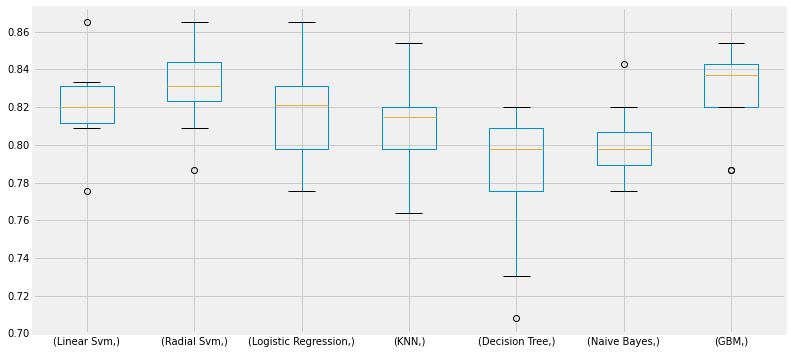

In [156]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

**5-3. Testing**

In [157]:
svc = svm.SVC(kernel='rbf')
svc.fit(x_train, y_train)

prediction = svc.predict(test)

In [160]:
submission = pd.DataFrame({
        "PassengerId": test.index,
        "Survived": prediction
    })

submission.to_csv('./submission.csv', index=False)